# Linear Regression Intro

Linear regression is the simplest regression technique where the latent function, $f(X)$, is assumed to be a straight line and is defined on a feature space of $X = [x_1, x_2, ..., x_n]$ as -


$$ Target \ variable,\ y = f(X) = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n + \epsilon$$


where $\beta_i$ is the *learnable* coefficient for the $i^{th}$ feature. $\beta_0$ is the intercept value. $\epsilon$ is the residual or in simple words, the error that could not be modelled.

The simplest objective function for this type of regression is the minimization of the sum of squared residuals (SSR). Other losses such as mean squared error (MSE), mean absolute error (MAE) etc. can also be used.

Note - Linear regression using SSR as the loss function is also called ordinary least square (OLS) regression. Scikit-Learn's implementation of linear regression is also an OLS regression.

## Loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split

## Dataset 1 (Linear)

In [2]:
df = pd.read_csv('dataset1.csv')
print(df.shape)

(100, 2)


In [ ]:
df.head(10)

,x1,y
0,9.363503,37.889247
1,23.767858,93.576394
2,18.299849,73.658198
3,14.966462,49.928004
4,3.900466,14.503505
5,3.899863,17.385015
6,1.452090,13.197831
7,21.654404,84.026263
8,15.027875,56.069033
9,17.701814,68.298473


Here, x1 is the feature and y is the target variable.

In [ ]:
X = df[['x1']].values
print(X.shape) # (n_samples, n_features)
#print(X)

y = df['y'].values
print(y.shape) # (n_samples,)
#print(y)

(100, 1)
(100,)


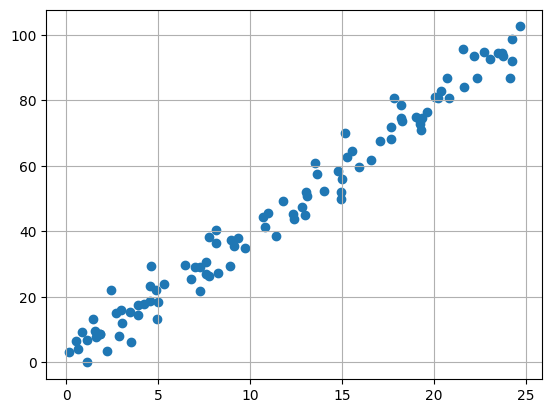

In [ ]:
plt.scatter(X,y)
plt.grid('on')

Since the trend of the data is linear, linear regression will be adequete to model this data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1867500)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (80, 1)
X_test shape: (20, 1)


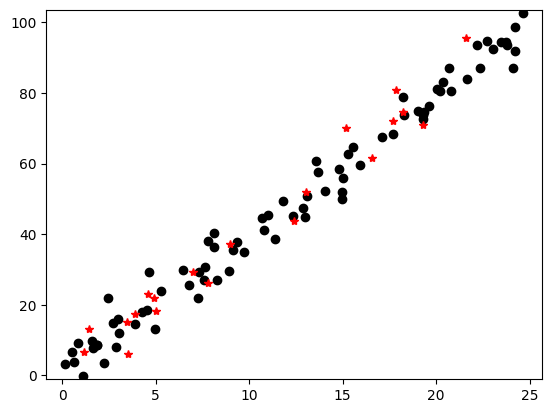

In [ ]:
plt.plot(X_train, y_train, "ko")
plt.plot(X_test, y_test, 'r*')

plt.axis([min(X)-1, max(X)+1, min(y)-1, max(y)+1]);

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

1.1505712126468026
[3.88214221]


theta0 is the $\beta_0$ from the equation and the theta1 contains all the other coefficients $-$ in this case $\beta_1$ since we only have one feature $x_1$.

Also, note that even if you run the training cell multiple times, you still get the same value. This is because Scikit-Learn uses a matrix solver to solve for the least square coefficients and does not use gradient solvers on random values. There are cases when the solution might be non-unique, but this is beyond the scope of the course.

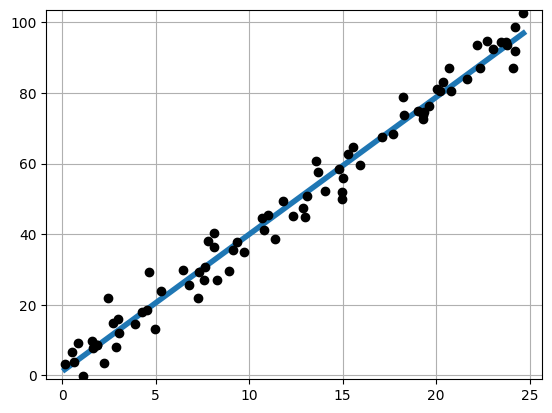

In [ ]:
xx = np.linspace(min(X), max(X), 100)
yy = theta0 + theta1*xx
plt.plot(xx, yy, lw=4)
plt.plot(X_train, y_train, 'ko')
plt.grid('on')
plt.axis([min(X)-1, max(X)+1, min(y)-1, max(y)+1])
plt.show()

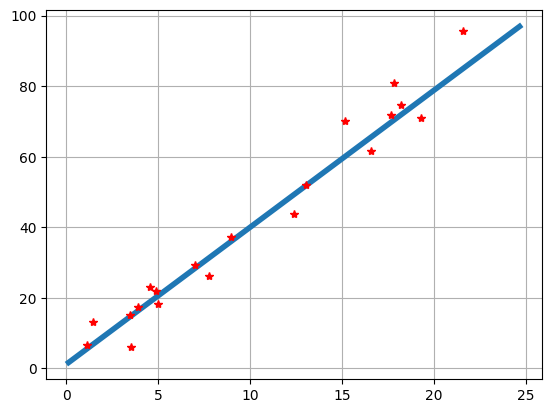

In [ ]:
plt.plot(xx, yy, lw=4)
plt.plot(X_test, y_test, 'r*')
plt.grid('on')
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)

y_predicted = model.predict(X_test)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 18.02655997609268
Testing loss: 29.163636366403416


## Dataset 2 (Non Linear)

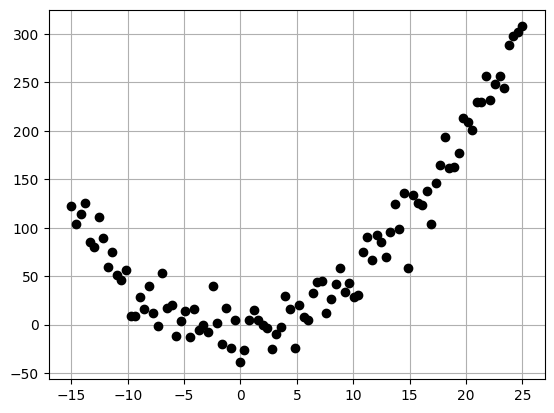

In [ ]:
df = pd.read_csv("dataset2.csv")
X = df[['x']].values
y = df['y'].values


plt.plot(X, y, 'ko')
plt.grid('on')

In [ ]:
df.head(10)

,x,y
0,-15.000000,122.434283
1,-14.595960,103.755732
2,-14.191919,113.659056
3,-13.787879,125.513398
4,-13.383838,84.880497
5,-12.979798,79.554839
6,-12.575758,110.659096
7,-12.171717,89.424044
8,-11.767677,59.849621
9,-11.363636,75.417317


The relationship between the target variable, $y$, and the feature variable, $x$, is parabolic. From the graph it can be approximately concluded that - $$y\approx m*x^2 + c$$

So, how do we deal with non-linearity such as this? Is it even possible using our OLS technique?

This is where feature engineering comes in. Well its a very simple modification in this specific case. But the gist is that if you know your dataset very well, you can always make modifications like this which will allow you to use simpler techniques like OLS to solve your problem.

In [ ]:
df['x^2'] = df['x']**2
df.head()

,x,y,x^2
0,-15.000000,122.434283,225.000000
1,-14.595960,103.755732,213.042037
2,-14.191919,113.659056,201.410570
3,-13.787879,125.513398,190.105601
4,-13.383838,84.880497,179.127130


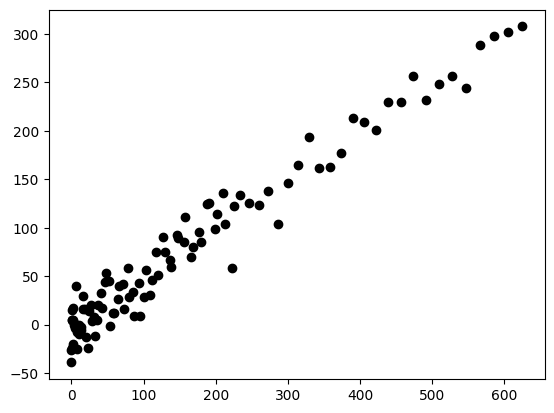

In [ ]:
plt.scatter(df['x^2'].values, df['y'].values, c = 'black');

In [ ]:
X = df[['x', 'x^2']].values
y = df['y'].values

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100, 2)
Shape of y: (100,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0)
print(theta1)

-1.704377916080304
[-0.00720009  0.50638943]


So, as expected you are getting a non-significant $(\sim 0)$ value for the coefficient of $x$, and a signficant value for $x^2$.

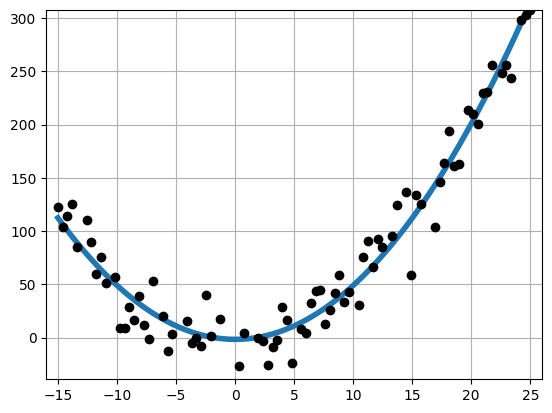

In [ ]:
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
yy = theta0 + theta1[0]*xx + theta1[1]*(xx**2)
plt.plot(xx, yy, lw=4)
plt.plot(X_train[:,0], y_train, 'ko')
plt.grid('on')
plt.axis([np.min(X[:,0])-1, np.max(X[:,0])+1, min(y), max(y)])
plt.show()

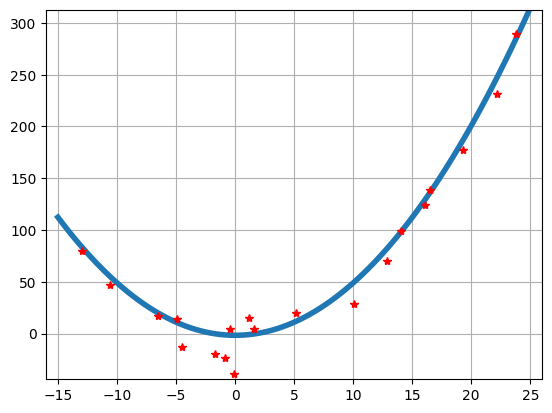

In [ ]:
plt.plot(xx, yy, lw=4)
plt.plot(X_test[:,0], y_test, 'r*')
plt.grid('on')
plt.axis([np.min(X[:,0])-1, np.max(X[:,0])+1, min(y)-5, max(y)+5])
plt.show()

In [ ]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predicted)**2)
print("Testing loss:", mse_test)

Training loss: 355.1292268550744
Testing loss: 7937.215683159065


## Boston Dataset

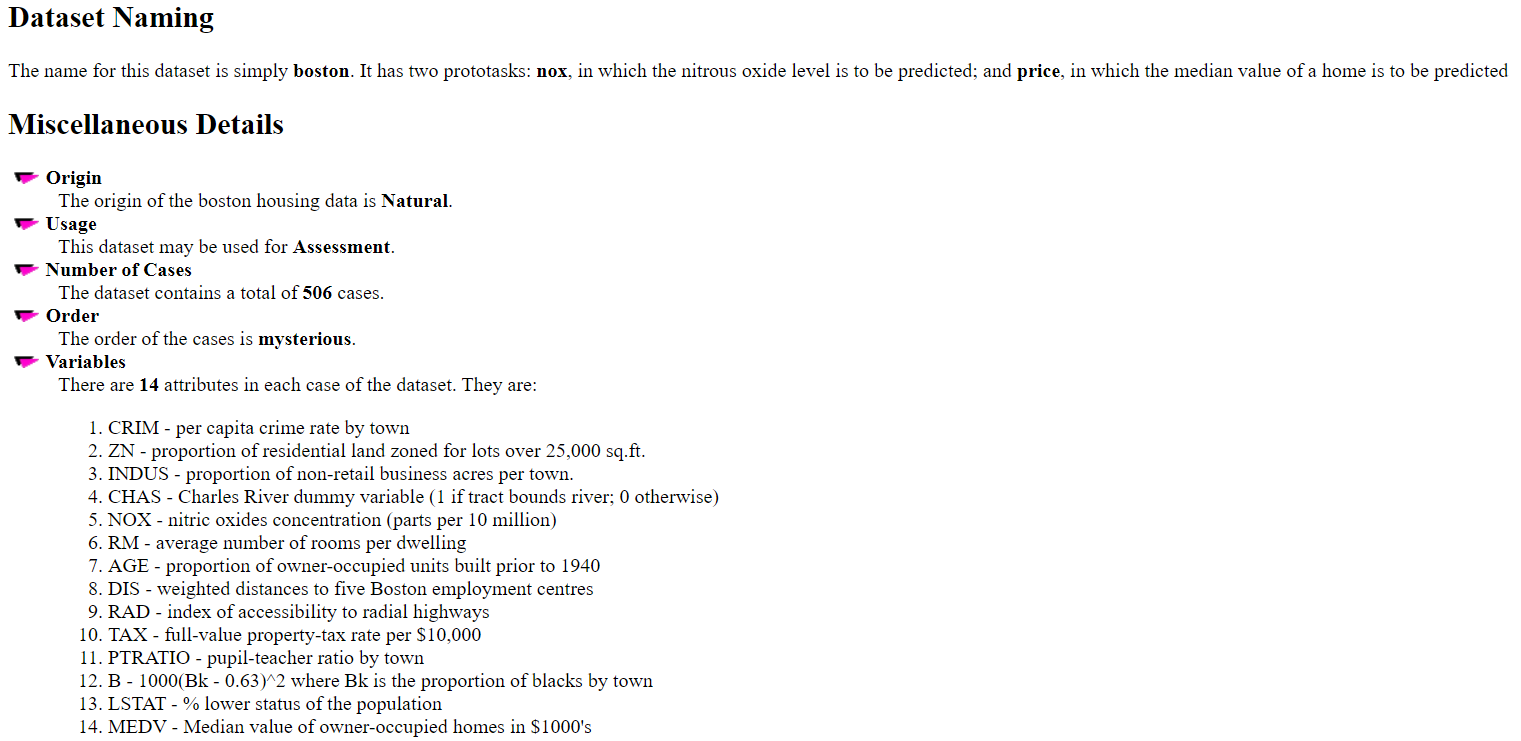

In [ ]:
# from sklearn.datasets import load_boston
# data = load_boston()
# data = datasets.load_boston()
# data.keys()

Scikit-Learn has removed the dataset owing to ethical bias. So, we don't get a processed data. Instead we load it from the raw version - http://lib.stat.cmu.edu/datasets/boston

You can try out the previous cell and check the error.

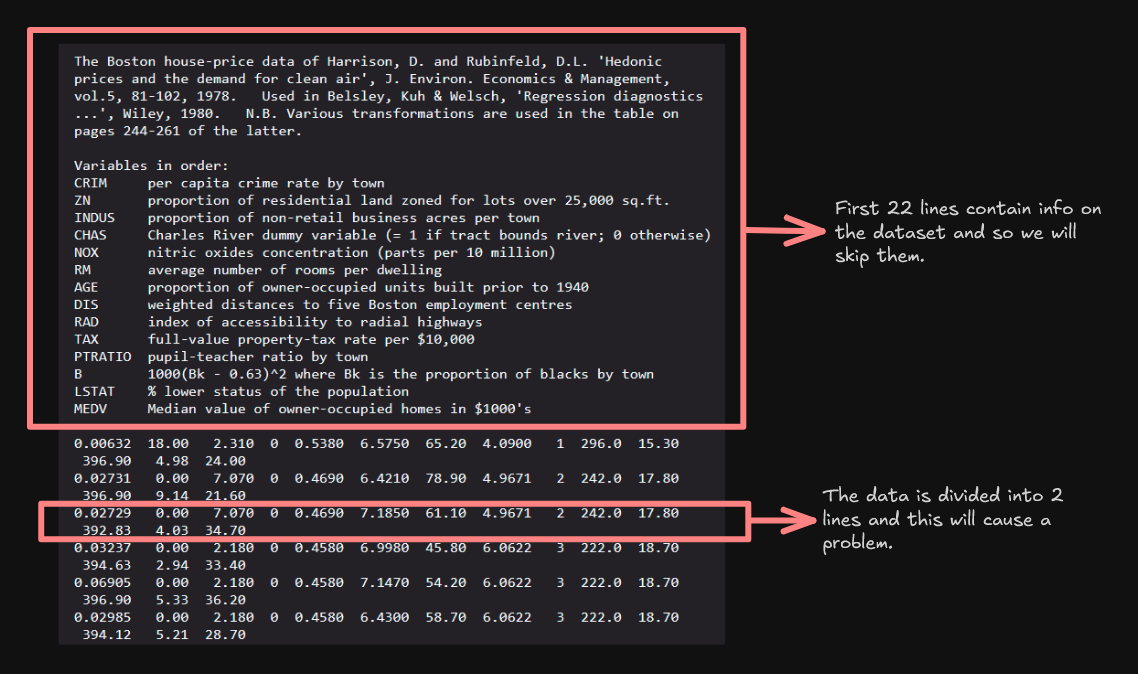

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

#skiprows = 22 ignores the first 22 lines
#\s+ is the regex expression for any length of white space

raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


Since the data is distributed into two lines, we have one line filled with info from 11 features and the other line with only 3 attributes. We have to horizontally stack odd lines with the immediate even lines.

In [ ]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
           'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.DataFrame(data, columns = columns)

In [ ]:
raw_df.iloc[::2,:]

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...
1002,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0
1004,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0
1006,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0
1008,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0


In [ ]:
raw_df.iloc[1::2, :3]

,0,1,2
1,396.90,4.98,24.0
3,396.90,9.14,21.6
5,392.83,4.03,34.7
7,394.63,2.94,33.4
9,396.90,5.33,36.2
...,...,...,...
1003,391.99,9.67,22.4
1005,396.90,9.08,20.6
1007,396.90,5.64,23.9
1009,393.45,6.48,22.0


In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Now lets try to predict MEDV feature from the rest of the features.

In [ ]:
X = data[columns[:-1]].to_numpy()
y = data[columns[-1]].to_numpy()

In [ ]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [ ]:
print(f'X - \n{X[0,:]} \n\ny - \n{y[0,]}')

X - 
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 

y - 
24.0


In [ ]:
for i in range(X.shape[-1]):
  print(min(X[:,i]),'---',max(X[:,i]))

0.00632 --- 88.9762
0.0 --- 100.0
0.46 --- 27.74
0.0 --- 1.0
0.385 --- 0.871
3.561 --- 8.78
2.9 --- 100.0
1.1296 --- 12.1265
1.0 --- 24.0
187.0 --- 711.0
12.6 --- 22.0
0.32 --- 396.9
1.73 --- 37.97


In [ ]:
X_norm = preprocessing.minmax_scale(X)

In [ ]:
for i in range(X.shape[-1]):
  print(min(X_norm[:,i]),'---',max(X_norm[:,i]))

0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 0.9999999999999999
0.0 --- 0.9999999999999999
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 1.0
0.0 --- 0.9999999999999999
0.0 --- 0.9999999999999998


Normalizing while using Scikit-Learn's Linear Regression doesn't matter much in terms of performance. Although the solver (not based on BackProp) achieves some numerical stability during the matrix procedures, but it still isn't necessary. However, if you are trying to weigh the contribution of each factors on equal scales, important for explainability, it is crucial that you normalize.

IMPORTANT - For gradient based learning, it is an absolute must that you normalize the inputs. Will be covered in the next lab.

Note - MinMax scaling is not always the best normalization trick. If the data contains extreme outliers, the normalization does more harm than help.

### With normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print("Testing loss:", mse_test)

Training loss: 21.649376911833603
Testing loss: 23.616994100563623


In [ ]:
theta0 = model.intercept_
theta1 = model.coef_
print(f'Intercept value = {theta0}')
for i in range(len(theta1)):
  print(f'{columns[i]} coefficient = {theta1[i]}')

Intercept value = 26.995592096303866
CRIM coefficient = -7.250124308366765
ZN coefficient = 4.804077817883592
INDUS coefficient = -0.14926258790454128
CHAS coefficient = 3.062605755170338
NOX coefficient = -7.842524402342358
RM coefficient = 19.166520064074067
AGE coefficient = -0.8268310261662277
DIS coefficient = -16.686789941370108
RAD coefficient = 6.607233156808285
TAX coefficient = -6.351278133250921
PTRATIO coefficient = -8.687111119848002
B coefficient = 3.7812348886315466
LSTAT coefficient = -17.608854676654374


Interpretable scores -

1. CRIM $-$ Per capita crime rate by town $-$ Self-explanatory

2. ZN $-$ Proportion of residential land zoned for lots over 25k sq. ft. $-$ Large land zones increase the asset price and so positive correlation.

3. INDUS $-$ Proportion of non-retail business acres per town $-$ This is a weak feature as most housing societies generally have access to some form of retail shops owing to their profitibility.

4. CHAS $-$ Charles River dummy variable (1 if tract bounds river; 0 otherwise) $-$ Who would not want to live by the river?

5. NOX $-$ Nitric oxides concentration (parts per 10 million) $-$ NOX concentration correlates to air pollution and higher air pollution decreases asset values.

6. RM $-$ Average number of rooms per dwelling $-$ Strongest feature and it makes sense. However, if you ever study XAI, you will see that RM and ZN are correlated and hence might give improper weighting.

7. AGE $-$ Proportion of owner-occupied units built prior to 1940 $-$ Weak feature, no proper trend.

8. DIS $-$ Weighted distances to five Boston employment centers $-$ Self-explanatory

9. RAD $-$ Index of accessibility to radial highways $-$ Self-explanatory

10. TAX $-$ Full-value property-tax rate per $10k $-$ Self-explanatory

11. PTRATIO $-$ Pupil-teacher ratio by town $-$ This is an interesting feature. Boston is mostly service-based with some of the best unis in the world. Many people move there for education and this metric proves exactly that.

12. B $-$ Proportions of blacks by town $-$ This feature got this dataset kicked from Scikit-Learn. But it shows a strong racial prejudice that once existed in USA. The house price increase with the increase of this feature value indicates artificial inflation to keep out people of a certain race.

13. LSTAT $-$ % lower status of the population $-$ Self-explanatory

### Without normalization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Training loss:", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print("Testing loss:", mse_test)

Training loss: 21.649376911833603
Testing loss: 23.61699410056367


In [ ]:
theta0 = model.intercept_
theta1 = model.coef_
print(f'Intercept value = {theta0}')
for i in range(len(theta1)):
  print(f'{columns[i]} coefficient = {theta1[i]}')

Intercept value = 36.33377028550769
CRIM coefficient = -0.08148964917528165
ZN coefficient = 0.04804077817883214
INDUS coefficient = -0.005471502489176202
CHAS coefficient = 3.0626057551703094
NOX coefficient = -16.136881486300855
RM coefficient = 3.672450673323267
AGE coefficient = -0.008515252586674661
DIS coefficient = -1.517408537075912
RAD coefficient = 0.2872710068177505
TAX coefficient = -0.012120759796280668
PTRATIO coefficient = -0.9241607574306372
B coefficient = 0.009534608121013297
LSTAT coefficient = -0.48589554847279876


The performance is still the same. However, the coefficients are all messed up and explainability is hard.

# Logistic Regression Intro

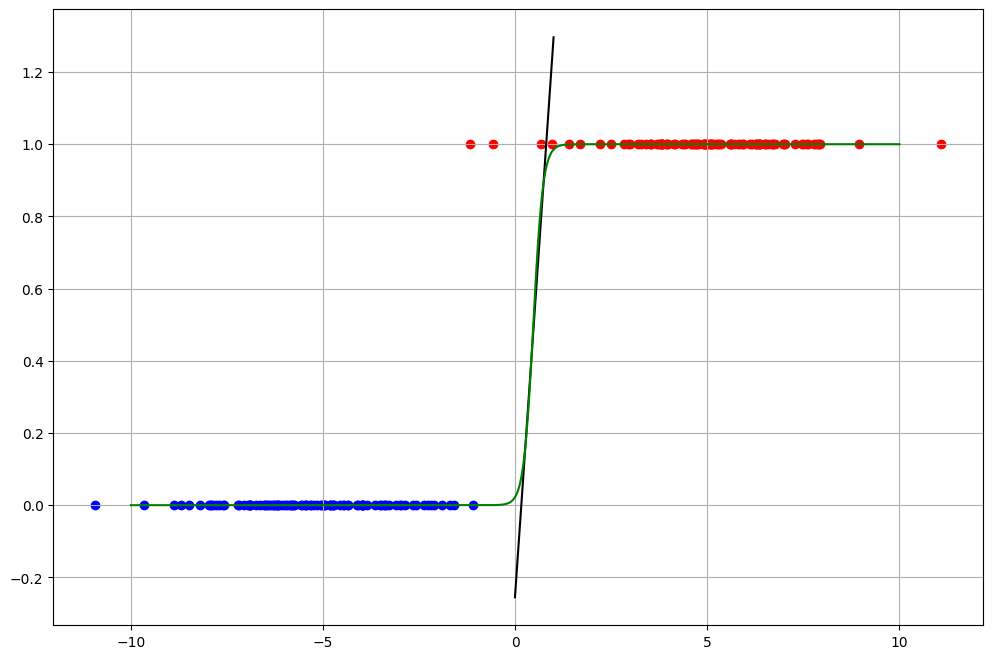

In [ ]:
x1 = 5 + 2*np.random.randn(100)
x2 = -5 + 1.75*np.random.randn(100)
y1 = np.ones_like(x1)
y2 = np.zeros_like(x2)

test_x = np.linspace(-10,10, 1000)
test_x_linear = np.linspace(-0.005,1, 1000)
test_y_linear = 1.5436671*test_x_linear -0.2474172680407093
test_y_sigmoid = test_x*7.95856009 - 3.75517287
test_y_sigmoid = 1/(1+np.exp(-test_y_sigmoid))

plt.figure(figsize=(12, 8))
plt.scatter(x1, y1, c = 'red')
plt.scatter(x2, y2, c = 'blue')
plt.plot(test_x_linear, test_y_linear, c = 'black')
plt.plot(test_x, test_y_sigmoid, c = 'green')
plt.grid('on')
plt.show()

Note - I trained a classification model and a linear regression model to get these graphs. As I did not use seed, if you retrain later, you might get different values.

However, it is clear that just a straight line just doesn't cut it anymore. It couldn't capture any of the data points. To catch the datapoints, we need a squiggly graph. How to get this squiggly graph?

Turns out there is a function called sigmoid function that takes an input ranging $[-∞, ∞]$ and outputs a range of $[0, 1]$ and it looks like $-$

$$sigmoid(x) = \frac{1}{1 + e^{-x}}$$

So, we have learned how to train a linear regression function that outputs a range of $[-∞, ∞]$ $-$

$$f(X) = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n + \epsilon$$

and we have learnt a way to transform the range to $[0, 1]$.

**What if we tie both together?**

If we do that, we will get logistic regression, which is defined by $-$

$$f(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n + \epsilon)}}$$

These type of transformation on top of linear models are called generalized linear models (GLMs) which has a form of $-$

$$g(Y) = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n + \epsilon$$

For logistic regression, $g(Y) = ln(\frac{Y}{1-Y})$

This $g(Y)$ creates an unique problem when we try to apply SSR or MSE or MAE losses. Since, $Y\in \{0, 1\}$, it infers $g(Y) \in \{-∞,∞\}$ for all ground truth values, which invalidates all three losses. This is why we use a different loss, cross-entropy loss. The binary variant for $i^{th}$ sample is as follows $-$

$$Cross \ Entropy \ Loss_i = - (y_i*ln(ŷ_i) + (1-y_i)*ln(1 -ŷ_i))$$

Here, $y_i$ is the ground truth and and $ŷ_i$ is the predicted probability. We generally take a mean on top of all the samples. Please look into the multiclass loss yourself. Here is a good reference - https://www.youtube.com/watch?v=6ArSys5qHAU

## Wisconsin Breast Cancer Dataset

### With normalization

Although, the theory might feel a bit difficult, the implementation is very easy. Lets see an example.

In [ ]:
data = datasets.load_breast_cancer() #Loading from sklearn
X = data['data']
y = data['target']

print("shape of X =", X.shape)
print("shape of y =", y.shape)
print("feature names:", data["feature_names"])

shape of X = (569, 30)
shape of y = (569,)
feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


This is the Wisconsin Breast Cancer Dataset taken from UCI repository. For its popularity, Scikit-Learn directly hosts it in their library.

In [ ]:
df = pd.DataFrame(data['data'], columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns=data["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)

In [ ]:
model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=100)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 99.34065934065934
Testing accuracy (%) = 97.36842105263158


The C=100 is the inverse regularization coefficient. Logistic regression uses regularization by default and supports both L1 and L2 types. You can turn off regularization if you want. Regularization is explained in the next segment.

Note - the C value was chosen through trial and error. Shown later.

In [ ]:
theta0 = model.intercept_
theta1 = model.coef_

columns = list(df.columns)

print(f'Intercept value = {theta0}')
for i in range(theta1.shape[1]):
  print(f'{columns[i]} coefficient = {theta1[0][i]}')

Intercept value = [22.36765593]
mean radius coefficient = -1.1887812722234323
mean texture coefficient = -3.489210075627753
mean perimeter coefficient = -1.0216000845986424
mean area coefficient = -2.7116797149360177
mean smoothness coefficient = -1.8750010093222842
mean compactness coefficient = 5.132822296289439
mean concavity coefficient = -5.380472152841764
mean concave points coefficient = -6.864760757252562
mean symmetry coefficient = 0.5731622812779339
mean fractal dimension coefficient = 3.0767078359472286
radius error coefficient = -13.780436876199003
texture error coefficient = -1.6789396236210505
perimeter error coefficient = -9.71883708825492
area error coefficient = -7.63252879897552
smoothness error coefficient = -1.9479692929305328
compactness error coefficient = 6.946353920114507
concavity error coefficient = 1.0391069378625957
concave points error coefficient = -2.691228494702687
symmetry error coefficient = 1.6554620016703774
fractal dimension error coefficient = 4.60

Logistic regression is also inherently explainable. But since this is a specialized data, we will not go deeper into interpretability.

### Without normalization

Most LogisticRegression solvers are gradient based like 'lbfgs'. So its important to normalize for the performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

model = linear_model.LogisticRegression(C=100, fit_intercept=True, solver='lbfgs', max_iter=10000)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 97.8021978021978
Testing accuracy (%) = 95.6140350877193


Notice how long it took to converge, and also how the performance has degraded for not normalizing.

# Note on normalization and gradient stability

The reason why normalizing is important for gradient based solvers is that, gradient based solvers generally use this form of update $-$

$$w_{i} = w_{i} - \alpha*\frac{d}{dw_i} Loss$$

where $\alpha$ is the learning rate.

Lets take a very simple linear regression task. We know $-$

$$ \ ŷ = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n$$

and,

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}(ŷ_i - y_i)^2$$

so, $\beta_i$ will have an update function $-$
$$\beta_i = \beta_i - \alpha*\frac{d}{d\beta_i}MSE$$

$$\implies \beta_i = \beta_i - \alpha*\frac{d}{d\beta_i}[\frac{1}{n} \sum_{i=1}^{n}(ŷ_i - y_i)^2]$$

$$\implies \beta_i = \beta_i - \frac{\alpha}{n}\sum_{i=1}^{n}\frac{d}{d\beta_i} (ŷ_i - y_i)^2$$

$$\implies \beta_i = \beta_i - \frac{2\alpha}{n}\sum_{i=1}^{n}(ŷ_i - y_i)\frac{d}{d\beta_i}(ŷ_i - y_i)$$

$$\implies \beta_i = \beta_i - \frac{2\alpha}{n}\sum_{i=1}^{n}(ŷ_i - y_i)\frac{d}{d\beta_i}(ŷ_i)$$

$$\implies \beta_i = \beta_i - \frac{2\alpha}{n}\sum_{i=1}^{n}(ŷ_i - y_i)\frac{d}{d\beta_i}(\beta_0 + \beta_1*x_1 + \beta_2*x_2 + ... + \beta_n*x_n)$$

$$\implies \beta_i = \beta_i - \frac{2\alpha}{n}\sum_{i=1}^{n}(ŷ_i - y_i)*x_i$$

That was a lot of derivation. But now look at the final product. $\sum_{i=1}^{n}(ŷ_i - y_i)$ will go to 0 as we reach optimal value and only will be large at the start. However, $\sum_{i=1}^{n} x_i$ doesn't get any smaller with iterations. It depends on the input, which if not scaled, will increase the change term and the weight value $\beta_i$ will oscillate around the minima instead of converging.

## Regularizers

Sometimes, the weights after training becomes too large (literally) on the training set and the model does not fit properly to the testing set anymore. In such cases, we have to penalize the weights somehow. Penalizing the weights while training is called regularizing. There are mainly two types of regularization $-$

$$L_1 \ regularization, \ Loss = Base \ Loss + \lambda*\sum |w|$$
$$L_2 \ regularization, \ Loss = Base \ Loss + \lambda*\sum w^2$$

Here, the $w$ term indicates the weights of the model. By embedding the weight terms in to the overall loss, the optimizer forces the weights to be low. The $\lambda$ term is an hyperparamter that controls how extreme the weight reduction will be.

### Dummy case

In [ ]:
x_train = np.random.randn(800)
x_test = np.random.randn(200)
y_train = x_train*3 + 2 + 0.5*np.random.randn(x_train.shape[0])
y_test = x_test*2.5 + 2 + 0.5*np.random.randn(x_test.shape[0])

x_train = preprocessing.minmax_scale(x_train)
x_test = preprocessing.minmax_scale(x_test)

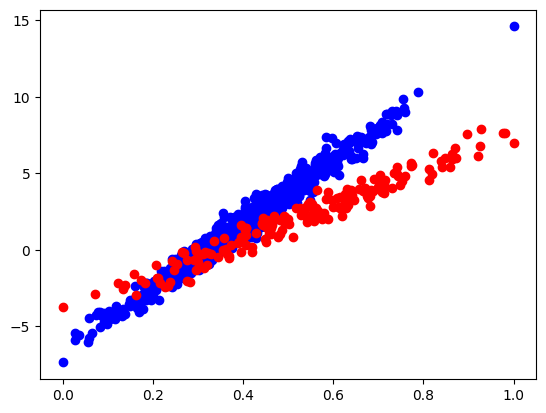

In [ ]:
plt.scatter(x_train, y_train, c='blue', label="Train set")
plt.scatter(x_test, y_test, c='red', label="Test set")
plt.legend();

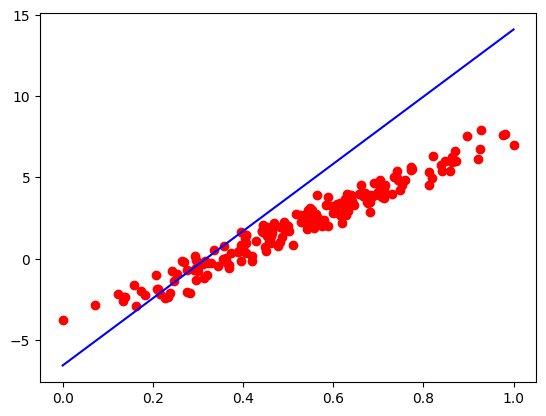

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(x_train.reshape([-1, 1]), y_train)
random_test = np.linspace(x_test.min(), x_test.max(), 100)
y_predict = model.predict(random_test.reshape([-1, 1]))
plt.scatter(x_test, y_test, c='red', label = "Test set")
plt.plot(random_test, y_predict, c = 'blue', label = "Line fit on train set")
plt.legend();

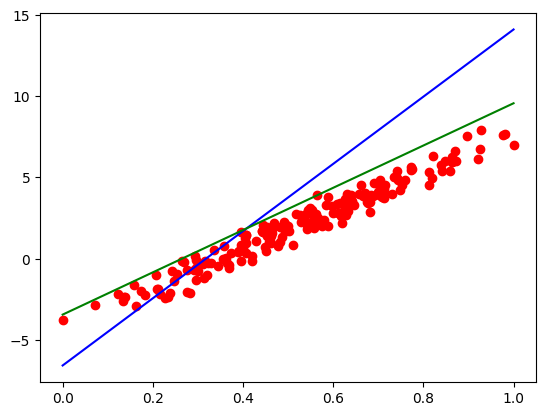

In [ ]:
model = linear_model.Ridge(alpha = 10)
model = model.fit(x_train.reshape([-1, 1]), y_train)
random_test = np.linspace(x_test.min(), x_test.max(), 100)
y_predict_new = model.predict(random_test.reshape([-1, 1]))
plt.scatter(x_test, y_test, c='red', label = "Test set")
plt.plot(random_test, y_predict, c='blue', label = "Without regularization")
plt.plot(random_test, y_predict_new, c='green', label = "With regularization")
plt.legend();

Note - Ridge regression uses L2 regularizer. The alpha parameter is the theoretical $λ$ parameter.

CAREFUL - Here I intentionally kept the slope of the test set lower than the train set. So penalizing the weights (slopes) brings the train slope down to test slope. But if the test slope was higher, penalizing the weights will have an adverse effect.

Also note that, you will be running this test on the train and the validation set. Your alpha needs to be tested through a grid search as you can never be too sure which alpha gives you the best result. Sometimes, applying no regularizer is better for your case and this has to be decided via trial and error. No other way unfortunately.

So, you may ask, what if my test set is too different from my training set? I want you to think about it yourself in the perspective of a real world problem.

### Boston dataset

In [ ]:
X = data[columns[:-1]].to_numpy()
y = data[columns[-1]].to_numpy()
X_norm = preprocessing.minmax_scale(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=100)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

In [ ]:
print("X_train shape = ", X_train.shape)
print("X_valid shape = ", X_valid.shape)
print("X_test shape = ", X_test.shape)

X_train shape =  (343, 13)
X_valid shape =  (61, 13)
X_test shape =  (102, 13)


In [ ]:
alpha_test = [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alpha_test:
    model = linear_model.Ridge(alpha=alpha)
    model = model.fit(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    mse_validation = np.mean((y_pred_valid - y_valid)**2)
    print(f'Alpha value = {alpha}; MSE = {mse_validation}')

Alpha value = 0; MSE = 19.883753555064548
Alpha value = 0.01; MSE = 19.89572298606271
Alpha value = 0.1; MSE = 20.005330509218446
Alpha value = 1; MSE = 21.19877834617892
Alpha value = 10; MSE = 31.170530790593254
Alpha value = 100; MSE = 56.33360063521482
Alpha value = 1000; MSE = 80.85748019016253
Alpha value = 10000; MSE = 87.44412930888026


As mentioned before, in certain cases regularization might harm performance and this is one of those cases. For $\lambda = 0$, we are getting the best performance which indicates to a non-regularized case.

In [ ]:
final_model = linear_model.Ridge(alpha=0.0)
final_model = final_model.fit(X_train, y_train)
y_predict = final_model.predict(X_test)

# measure performance
mse_train = np.mean((y_train - final_model.predict(X_train))**2)
mse_test = np.mean((y_test - y_predict)**2)
print("MSE on training data=", mse_train)
print("MSE on testing data=", mse_test)

MSE on training data= 22.05322495942248
MSE on testing data= 24.372459903600923


We can notice some performance degradation compared to our first trial. Why?

$-$Its because we gave up some data to create the validation set.